In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("BlackFridaySalesDataset/train.csv")

In [3]:
print(df.shape)
df.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.drop(['User_ID'],axis=1,inplace=True)
df.drop(['Product_ID'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [7]:
print(df['Gender'].unique())
print(df['Age'].unique())
print(df['Occupation'].unique())
print(df['City_Category'].unique())
print(df['Stay_In_Current_City_Years'].unique())
print(df['Marital_Status'].unique())
print(df['Product_Category_1'].unique())
print(df['Product_Category_2'].unique())
print(df['Product_Category_3'].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [8]:
#Converting Gender to Numerical Data
df['is_Male']=df['Gender'].map({'F':0,'M':1})
df.drop(['Gender'],inplace=True,axis=1)
df['is_Male']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: is_Male, Length: 550068, dtype: int64

In [9]:
#Converting Age to Ordinal data (Based on estimated Purchase Frequency per Age Group)
df['Age']=df['Age'].map({'55+':0,'0-17':1,'51-55':2,'46-50':3,'26-35':4,'36-45':5,'18-25':6})
df['Age']

0         1
1         1
2         1
3         1
4         0
         ..
550063    2
550064    4
550065    4
550066    0
550067    3
Name: Age, Length: 550068, dtype: int64

In [10]:
#Converting City Category to Numerical Data
df=df.join(pd.get_dummies(df['City_Category'],dtype=int))
df.drop(['City_Category'],inplace=True,axis=1)
df.head(3)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,is_Male,A,B,C
0,1,10,2,0,3,NaN,NaN,8370,0,1,0,0
1,1,10,2,0,1,6.0,14.0,15200,0,1,0,0
2,1,10,2,0,12,NaN,NaN,1422,0,1,0,0


In [11]:
#Converting Stay to Numerical Data
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int64

In [12]:
df.head(10)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,is_Male,A,B,C
0,1,10,2,0,3,NaN,NaN,8370,0,1,0,0
1,1,10,2,0,1,6.0,14.0,15200,0,1,0,0
2,1,10,2,0,12,NaN,NaN,1422,0,1,0,0
3,1,10,2,0,12,14.0,NaN,1057,0,1,0,0
4,0,16,4,0,8,NaN,NaN,7969,1,0,0,1
5,4,15,3,0,1,2.0,NaN,15227,1,1,0,0
6,3,7,2,1,1,8.0,17.0,19215,1,0,1,0
7,3,7,2,1,1,15.0,NaN,15854,1,0,1,0
8,3,7,2,1,1,16.0,NaN,15686,1,0,1,0
9,4,20,1,1,8,NaN,NaN,7871,1,1,0,0


In [13]:
#Missing Values
df.isnull().sum()

Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
is_Male                            0
A                                  0
B                                  0
C                                  0
dtype: int64

In [14]:
print(df['Product_Category_2'].unique())
df['Product_Category_2'].value_counts()
#Replacing nan values with mode, since it is a discrete feature
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0],inplace=True)

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [15]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0],inplace=True)

In [16]:
#Visualisation
#sns.pairplot(df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

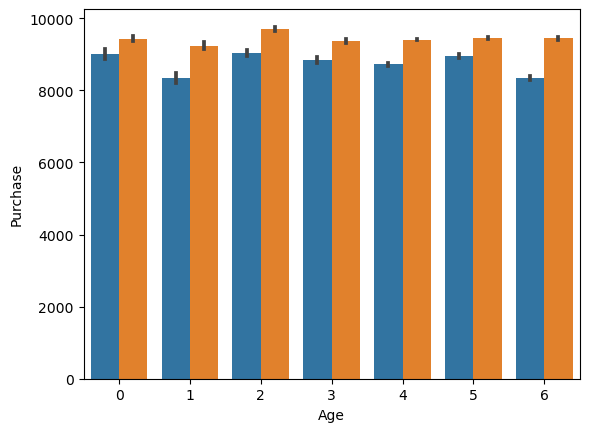

In [17]:
sns.barplot(data=df,x='Age',y='Purchase',hue='is_Male')

In [ ]:
#df.plot.pie(y='Product_Category_3')

: 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Purchase'],axis=1), df['Purchase'], test_size=0.33, random_state=42)

In [29]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [49]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
y_pred=linreg.predict(X_test)
print("Linear Regression Model MSE",mean_squared_error(y_test,y_pred))

from sklearn.tree import DecisionTreeRegressor
dectree=DecisionTreeRegressor().fit(X_train,y_train)
y_pred=dectree.predict(X_test)
print("Decision Model MSE",mean_squared_error(y_test,y_pred))

Linear Regression Model MSE 1.1072596385923903e+25
Decision Model MSE 11169619.535654597


In [50]:
#Prediction on Test Dataset
#Converting testing data features
df_test=pd.read_csv("BlackFridaySalesDataset/test.csv")

df_test.drop(['User_ID'],axis=1,inplace=True)
df_test.drop(['Product_ID'],axis=1,inplace=True)

df_test['is_Male']=df_test['Gender'].map({'F':0,'M':1})
df_test.drop(['Gender'],inplace=True,axis=1)

df_test['Age']=df_test['Age'].map({'55+':0,'0-17':1,'51-55':2,'46-50':3,'26-35':4,'36-45':5,'18-25':6})

df_test=df_test.join(pd.get_dummies(df_test['City_Category'],dtype=int))
df_test.drop(['City_Category'],inplace=True,axis=1)

df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})

df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mode()[0],inplace=True)

df_test['Product_Category_3'].fillna(df_test['Product_Category_3'].mode()[0],inplace=True)

In [51]:
linreg.predict(df_test)

c:\Users\krish\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([2.35751384e+15, 2.21246465e+15, 2.35751384e+15, ...,
       2.35751384e+15, 2.21246465e+15, 2.35751384e+15])